In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Carga de archivos

In [128]:
na_values = ['nan', 'NaN', ""]
df1 = pd.read_excel('data/Composicion de Cartera de clientes de Auto.xlsx', na_values=na_values)

In [129]:
df1.columns = df1.columns.str.title().str.strip()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28486 entries, 0 to 28485
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Cd_Persona V2                  28486 non-null  int64         
 1   Tp_Documento                   28486 non-null  object        
 2   Cd_Sexo                        25121 non-null  object        
 3   Cd_Estado_Civil                25121 non-null  object        
 4   Rango De Edad                  28486 non-null  object        
 5   Tiempo Desde Registro (Meses)  28486 non-null  int64         
 6   In_Lista_Negra                 137 non-null    float64       
 7   Cd_Pais_Nacimiento             25485 non-null  object        
 8   Cd_Nacionalidad                26969 non-null  object        
 9   In_Inactivo                    6 non-null      float64       
 10  Fe_Inactivo                    6 non-null      datetime64[ns]
 11  In_Vip         

In [130]:
df1 = df1.rename(columns = {'Cd_Persona V2':'Codigo_Cliente',
                           'Rango De Edad':'Rango_Edad',
                           'Tiempo Desde Registro (Meses)':'Meses_Desde_Registro'})

df1.head()

,Codigo_Cliente,Tp_Documento,Cd_Sexo,Cd_Estado_Civil,Rango_Edad,Meses_Desde_Registro,In_Lista_Negra,Cd_Pais_Nacimiento,Cd_Nacionalidad,In_Inactivo,...,Cd_Provincia_Nacimiento,De_Act_Economica_Adicional,Cd_Sucursal_Envio,De_Sector,De_Ocupacion,De_Actividad,De_Ingreso_Anual,De_Profesion,De_Tipo_Persona,De_Provincia
0,240,RNC,NaN,NaN,,108,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,Industrial,0,0,0,0,Juridica,0
1,267,RNC,NaN,NaN,,1476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,Juridica,0
2,270,RNC,NaN,NaN,,1476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,Juridica,0
3,279,RNC,NaN,NaN,,1476,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,Juridica,0
4,288,RNC,NaN,NaN,,1476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,Juridica,0


Data cleaning operations

In [131]:
df1['Tp_Documento'] = np.where(df1['Tp_Documento']=="P","PAS",df1['Tp_Documento'])
df1['In_Lista_Negra'].fillna(0, inplace=True)
df1['In_Vip'].fillna(0, inplace=True)

mode_value = df1['Cd_Pais_Nacimiento'].mode()[0] # DOM
df1['Cd_Pais_Nacimiento'].fillna(mode_value, inplace=True)
df1['Cd_Pais_Nacimiento'] = np.where(df1['Cd_Pais_Nacimiento']=="nan", mode_value, df1['Cd_Pais_Nacimiento'])

df1['Cd_Provincia_Nacimiento'] = df1['Cd_Provincia_Nacimiento'].astype('Int64')
df1['Cd_Sucursal_Envio'] = df1['Cd_Sucursal_Envio'].astype('Int64')
df1['In_Inactivo'] = np.where(df1['In_Inactivo'].isna(), 0, df1['In_Inactivo'])
df1['In_Inactivo'] = df1['In_Inactivo'].astype(int)

mode_value = df1['Cd_Sexo'].mode()[0] 
df1['Cd_Sexo'] = np.where(df1['Cd_Sexo']=="nan", mode_value, df1['Cd_Sexo'])
df1['Cd_Sexo'] = np.where(df1['Cd_Sexo'].isna(), mode_value, df1['Cd_Sexo'])

# Handle Categorical Variables
# df1 = pd.get_dummies(df1, columns=['Tp_Documento', 'Cd_Sexo', 'Cd_Estado_Civil'])
df1
df1.Tp_Documento.value_counts()

Tp_Documento
CED    24083
RNC     3368
PAS     1035
Name: count, dtype: int64

In [132]:
df1.loc[df1['Codigo_Cliente'] == 7668].T

,1521
Codigo_Cliente,7668
Tp_Documento,RNC
Cd_Sexo,M
Cd_Estado_Civil,NaN
Rango_Edad,
Meses_Desde_Registro,1476
In_Lista_Negra,0.0
Cd_Pais_Nacimiento,DOM
Cd_Nacionalidad,NaN
In_Inactivo,0


In [133]:
df1['Codigo_Cliente'].nunique()

28486

In [134]:
df2 = pd.read_excel('data/Historico Auto y Caracteristicas de Vehiculo.xlsx', na_values=na_values)

In [135]:
df2.columns = df2.columns.str.title().str.strip()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55707 entries, 0 to 55706
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Cd_Persona V2     55707 non-null  int64 
 1   Poliza Id V2      55707 non-null  int64 
 2   Tipo_Vehiculo     55707 non-null  object
 3   Color             55707 non-null  object
 4   Marca             55707 non-null  object
 5   Modelo            55707 non-null  object
 6   Año               55707 non-null  int64 
 7   Tipo Transmision  55704 non-null  object
dtypes: int64(3), object(5)
memory usage: 3.4+ MB


In [136]:
df2 = df2.rename(columns = {'Cd_Persona V2':'Codigo_Cliente',
                           'Poliza Id V2':'Codigo_Poliza',
                           'Tipo Transmision':'Tipo_Transmision'})

df2.head()

,Codigo_Cliente,Codigo_Poliza,Tipo_Vehiculo,Color,Marca,Modelo,Año,Tipo_Transmision
0,240,11473,Jeeps y Vanette,Blanco,LEXUS,RX350,2014,Automatico
1,240,11474,Camion,Blanco,MITSUBISHI,FUSO,2007,Sincronico_Camión
2,267,11475,Camioneta,Blanco,ISUZU,D-MAX,2008,Automatico
3,267,11476,Jeeps y Vanette,Blanco,TOYOTA,LAND CRUISER,2002,Automatico
4,267,11477,Furgoneta,Blanco,SHINERAY,MINI TRUCK,2018,Furgoneta_Sincronico


In [137]:
df2.Codigo_Cliente.nunique()

28519

In [138]:
df2.Tipo_Vehiculo.value_counts()

Tipo_Vehiculo
Jeeps y Vanette                   24701
Automovil                         16201
Camioneta                          4456
Furgoneta                          2335
Camion                             1603
Camiones cama                      1515
Motocicleta                        1156
Cabezotes, Patanas y Tractores     1118
Minibus                             970
Autobus                             788
Maquinaria Pesada                   610
Remolque                            200
Volqueta                             46
Grua                                  4
Otros Tipos                           4
Name: count, dtype: int64

In [139]:
df2.Marca.value_counts()

Marca
HYUNDAI    8287
TOYOTA     7781
KIA        5114
HONDA      4404
FORD       4006
           ... 
ZEMAN         1
CHANNA        1
ROLATEC       1
AGY           1
TUCAN         1
Name: count, Length: 324, dtype: int64

In [303]:
df3 = pd.read_excel('data/Historico de Siniestros.xlsx', na_values=na_values)

In [304]:
df3.columns = df3.columns.str.title().str.strip()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18706 entries, 0 to 18705
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id _ Siniestro            18706 non-null  int64         
 1   Cd_Personav2              18706 non-null  int64         
 2   Fe_Ocurrencia             18706 non-null  datetime64[ns]
 3   Poliza Id V2              18706 non-null  int64         
 4   Cd_Provincia              18705 non-null  float64       
 5   Cd_Ciudad                 18705 non-null  float64       
 6   De_Lugar_Ocurrencia       18495 non-null  object        
 7   Nu_Siniestro_Relacionado  18706 non-null  object        
 8   In_Fraude                 18070 non-null  float64       
 9   De_Causa_Siniestro        18706 non-null  object        
 10  De_Causa_Detalle          18706 non-null  object        
 11  De_Provincia              18706 non-null  object        
 12  De_Ciudad         

In [305]:
df3 = df3.rename(columns = {'Id _ Siniestro':'Codigo_Siniestro',
                           'Poliza Id V2':'Codigo_Poliza',
                           'Cd_Personav2':'Codigo_Cliente'})

df3.head()

,Codigo_Siniestro,Codigo_Cliente,Fe_Ocurrencia,Codigo_Poliza,Cd_Provincia,Cd_Ciudad,De_Lugar_Ocurrencia,Nu_Siniestro_Relacionado,In_Fraude,De_Causa_Siniestro,De_Causa_Detalle,De_Provincia,De_Ciudad,Hora_Ocurrencia,Relacion_Reclamante,Evento_Catastrofico
0,1,7668,2015-05-29,1,29.0,1.0,Siniestro reportado vía cover.,,0.0,Accidente/Choque,Choque Simple,Distrito Nacional,Santo Domingo,17:15,0,0
1,2,23643,2016-02-12,2,29.0,1.0,C/ MAYAGUEZ URB. VILLAS DUMIT,,0.0,Accidente/Choque,Choque con Objeto,,,,,
2,3,29730,2016-02-09,3,1.0,1.0,Barahora,,0.0,Responsabilidad Civil Personas o Cosas,Lesiones y/o Muerte Pasajero/Terceros/ Daños a...,,,,,
3,4,14301,2016-02-15,4,1.0,1.0,Arroyo Hondo II,,0.0,Robo o Hurto Accesorios/ Partes o Piezas,Robo Accesorio y/o Piezas,Distrito Nacional,Santo Domingo,16:30,0,0
4,5,24144,2016-02-03,5,1.0,1.0,Avenida Gustavo Mejia Ricart,,0.0,Accidente/Choque,Colision,,,,,


In [306]:
df3['Fe_Ocurrencia'] = pd.to_datetime(df3['Fe_Ocurrencia'], errors='coerce')
df3['Hora_Ocurrencia'] = pd.to_datetime(df3['Hora_Ocurrencia'], errors='coerce').dt.hour
df3['Relacion_Reclamante'] = np.where(df3['Relacion_Reclamante'].isin(["0"," ",0]),"",df3['Relacion_Reclamante'])
df3['Evento_Catastrofico'] = np.where(df3['Evento_Catastrofico'].isin(["0"," ",0]),"",df3['Evento_Catastrofico'])
df3['Evento_Catastrofico'] = np.where(df3['Evento_Catastrofico'].isin(['Huracán Elsa   02/04-Jul-2021']),"Huracán Elsa",df3['Evento_Catastrofico'])
df3['Evento_Catastrofico'] = np.where(df3['Evento_Catastrofico'].isin(['Vaguada 04-Nov-2022']),"Vaguada Nov 2022",df3['Evento_Catastrofico'])
df3['In_Fraude'] = np.where(df3['In_Fraude'].isna(),"0",df3['In_Fraude'])
df3['In_Fraude'] = df3['In_Fraude'].astype(float)

C:\Users\Aneur\AppData\Local\Temp\ipykernel_19108\1316341344.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3['Hora_Ocurrencia'] = pd.to_datetime(df3['Hora_Ocurrencia'], errors='coerce').dt.hour


In [307]:
df3.Fe_Ocurrencia.sort_values().value_counts()

Fe_Ocurrencia
2022-11-04    57
2018-07-10    22
2018-02-20    17
2017-11-08    16
2017-02-23    16
              ..
2020-11-05     1
2015-05-28     1
2015-05-16     1
2015-05-15     1
2014-07-05     1
Name: count, Length: 3118, dtype: int64

In [308]:
df3.De_Causa_Siniestro.value_counts()

De_Causa_Siniestro
Accidente/Choque                            12935
Rotura de Vidrios y/o Parabrisas             2910
Responsabilidad Civil Personas o Cosas       2048
Robo o Hurto Accesorios/ Partes o Piezas      349
No Registrado                                 229
Hechos de la Naturaleza                       114
Daños Maliciosos al Vehículo/APOV              99
Robo o Hurto  Vehiculo                         22
Name: count, dtype: int64

In [309]:
df3.De_Causa_Detalle.value_counts()

De_Causa_Detalle
Colision                                                                   8395
0                                                                          3159
Choque Simple                                                              2791
Daños a la Propiedad de Terceros                                           1750
Choque Estacionado                                                          898
Choque con Objeto                                                           605
Robo  Accesorio y/o Piezas                                                  259
Lesiones y/o Muerte Pasajero/Terceros/ Daños a la Propiedad de Terceros     177
Choque con Lesionado                                                        153
Lesiones y/o Muerte a  Terceros                                             112
Hurto  Accesorio y/o Piezas                                                  90
Vandalismo                                                                   88
Inundacion y/o Ras de M

In [310]:
df3.Codigo_Cliente.nunique()

8778

In [311]:
df3.shape

(18706, 16)

In [312]:
df3.columns

Index(['Codigo_Siniestro', 'Codigo_Cliente', 'Fe_Ocurrencia', 'Codigo_Poliza',
       'Cd_Provincia', 'Cd_Ciudad', 'De_Lugar_Ocurrencia',
       'Nu_Siniestro_Relacionado', 'In_Fraude', 'De_Causa_Siniestro',
       'De_Causa_Detalle', 'De_Provincia', 'De_Ciudad', 'Hora_Ocurrencia',
       'Relacion_Reclamante', 'Evento_Catastrofico'],
      dtype='object')

In [313]:
df3 = df3.merge(df1, on = ['Codigo_Cliente'], how = 'left')
df3 = df3.merge(df2, on = ['Codigo_Cliente','Codigo_Poliza'], how = 'left')

In [314]:
df3.columns

Index(['Codigo_Siniestro', 'Codigo_Cliente', 'Fe_Ocurrencia', 'Codigo_Poliza',
       'Cd_Provincia', 'Cd_Ciudad', 'De_Lugar_Ocurrencia',
       'Nu_Siniestro_Relacionado', 'In_Fraude', 'De_Causa_Siniestro',
       'De_Causa_Detalle', 'De_Provincia', 'De_Ciudad', 'Hora_Ocurrencia',
       'Relacion_Reclamante', 'Evento_Catastrofico', 'Tp_Documento', 'Cd_Sexo',
       'Cd_Estado_Civil', 'Rango_Edad', 'Meses_Desde_Registro',
       'In_Lista_Negra', 'Cd_Pais_Nacimiento', 'Cd_Nacionalidad',
       'In_Inactivo', 'Fe_Inactivo', 'In_Vip', 'Cd_Provincia_Nacimiento',
       'De_Act_Economica_Adicional', 'Cd_Sucursal_Envio', 'De_Sector',
       'De_Ocupacion', 'De_Actividad', 'De_Ingreso_Anual', 'De_Profesion',
       'De_Tipo_Persona', 'Tipo_Vehiculo', 'Color', 'Marca', 'Modelo', 'Año',
       'Tipo_Transmision'],
      dtype='object')

# EDA

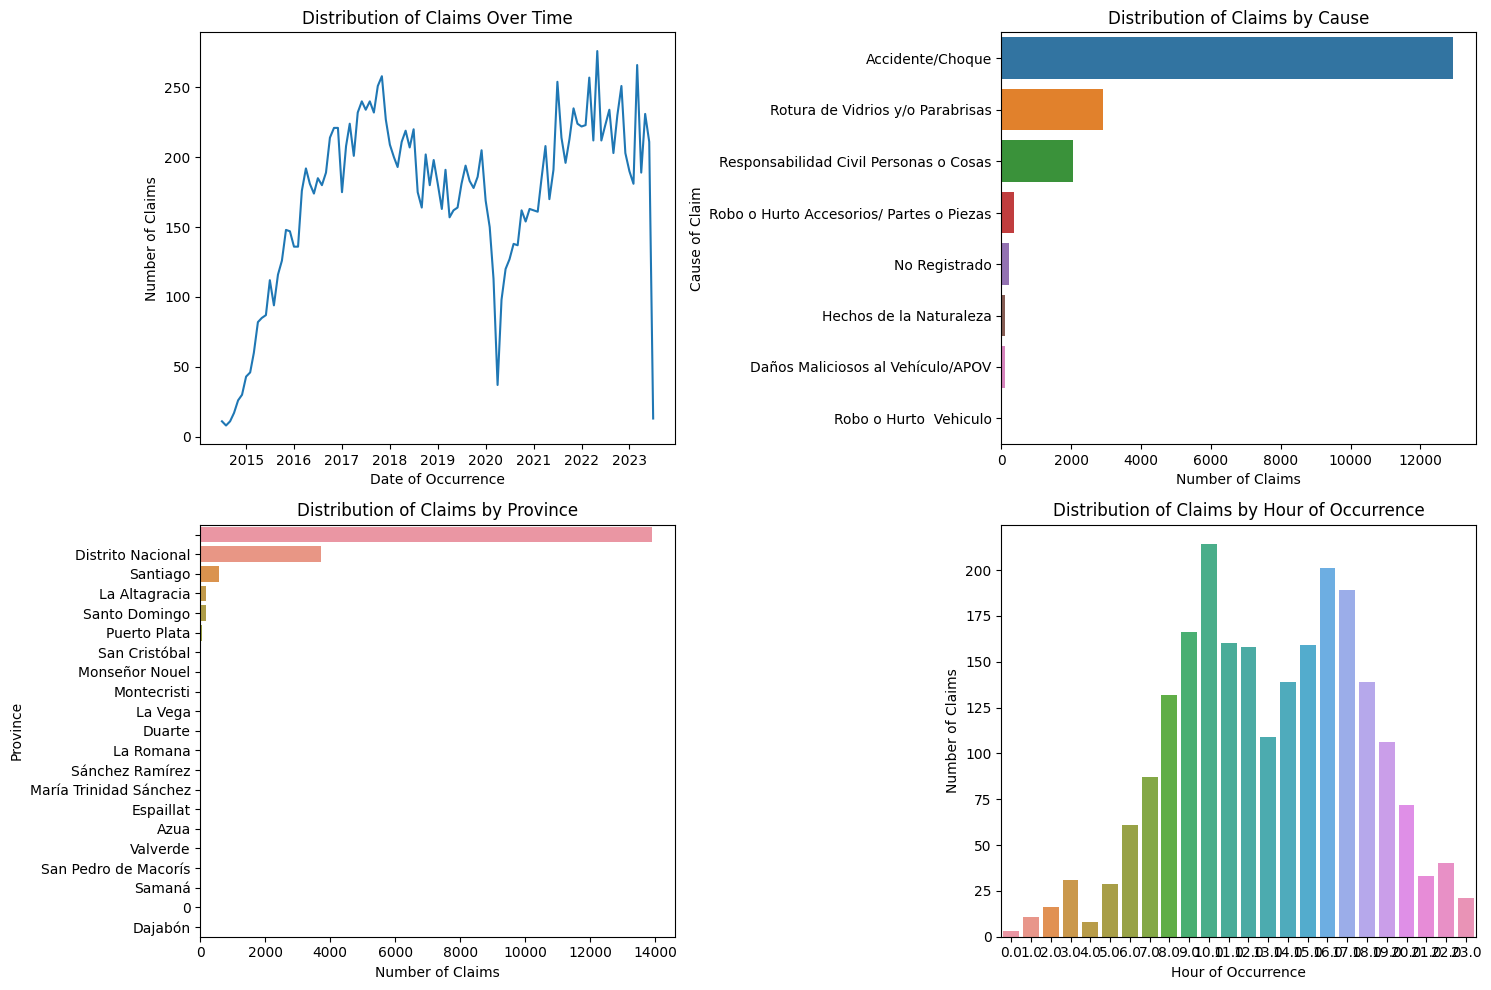

In [315]:
data = df3.copy()
data_clean = data.dropna(subset=['Fe_Ocurrencia'])
data_clean['month'] = data['Fe_Ocurrencia'].dt.to_period('M')
monthly_counts_clean = data_clean.groupby('month').size()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot the distribution of claims over time
sns.lineplot(x=monthly_counts_clean.index.to_timestamp(), y=monthly_counts_clean.values, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Claims Over Time')
axs[0, 0].set_xlabel('Date of Occurrence')
axs[0, 0].set_ylabel('Number of Claims')

# Plot the distribution of claims by cause
sns.countplot(data=data_clean, y='De_Causa_Siniestro', ax=axs[0, 1], order=data_clean['De_Causa_Siniestro'].value_counts().index)
axs[0, 1].set_title('Distribution of Claims by Cause')
axs[0, 1].set_xlabel('Number of Claims')
axs[0, 1].set_ylabel('Cause of Claim')

# Plot the distribution of claims by province
sns.countplot(data=data_clean, y='De_Provincia', ax=axs[1, 0], order=data_clean['De_Provincia'].value_counts().index)
axs[1, 0].set_title('Distribution of Claims by Province')
axs[1, 0].set_xlabel('Number of Claims')
axs[1, 0].set_ylabel('Province')

# Plot the distribution of claims by hour of occurrence
sns.countplot(data=data_clean, x='Hora_Ocurrencia', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Claims by Hour of Occurrence')
axs[1, 1].set_xlabel('Hour of Occurrence')
axs[1, 1].set_ylabel('Number of Claims')

# Show the plots
plt.tight_layout()
plt.show()


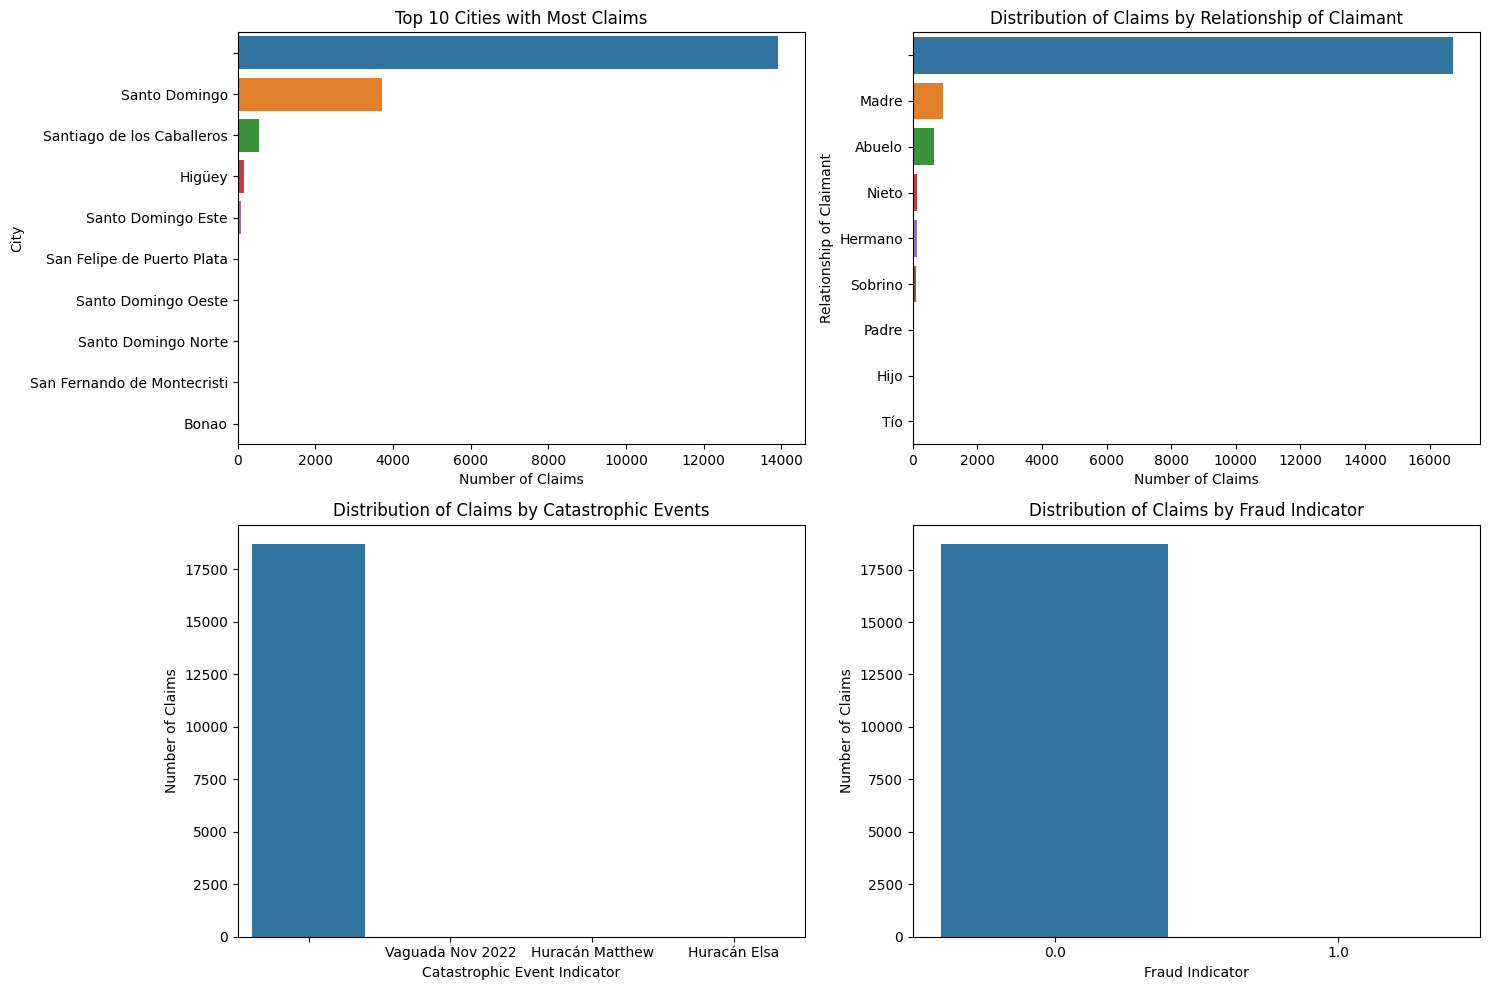

In [316]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot the distribution of claims by city
sns.countplot(data=data_clean, y='De_Ciudad', ax=axs[0, 0], order=data_clean['De_Ciudad'].value_counts().iloc[:10].index)
axs[0, 0].set_title('Top 10 Cities with Most Claims')
axs[0, 0].set_xlabel('Number of Claims')
axs[0, 0].set_ylabel('City')

# Plot the distribution of claims by relationship of the claimant
sns.countplot(data=data_clean, y='Relacion_Reclamante', ax=axs[0, 1], order=data_clean['Relacion_Reclamante'].value_counts().index)
axs[0, 1].set_title('Distribution of Claims by Relationship of Claimant')
axs[0, 1].set_xlabel('Number of Claims')
axs[0, 1].set_ylabel('Relationship of Claimant')

# Plot the distribution of claims by catastrophic events
sns.countplot(data=data_clean, x='Evento_Catastrofico', ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Claims by Catastrophic Events')
axs[1, 0].set_xlabel('Catastrophic Event Indicator')
axs[1, 0].set_ylabel('Number of Claims')

# Plot the distribution of claims by fraud indicator
sns.countplot(data=data_clean, x='In_Fraude', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Claims by Fraud Indicator')
axs[1, 1].set_xlabel('Fraud Indicator')
axs[1, 1].set_ylabel('Number of Claims')

# Show the plots
plt.tight_layout()
plt.show()

# Add parque vehicular

In [317]:
parque_vehicular = pd.read_excel('data/Parque Vehicular 2014 - 2023.xlsx', na_values=na_values)
parque_vehicular.rename(columns={"Cantidad":"Cantidad_Parque_Vehicular"}, inplace=True)
parque_vehicular['ano'] = parque_vehicular['Periodo'].dt.strftime('%Y')
parque_vehicular.drop(columns="Periodo",inplace=True)
parque_vehicular.head()

,Clase,Cantidad_Parque_Vehicular,ano
0,Motocicletas,3191930,2023
1,Jeep,653866,2023
2,Automoviles,1105668,2023
3,Carga,510916,2023
4,Autobuses,127360,2023


In [318]:
parque_vehicular.dtypes

Clase                        object
Cantidad_Parque_Vehicular     int64
ano                          object
dtype: object

In [319]:
def replace_values(df, column, replacements):
    for old_value, new_value in replacements.items():
        df[column] = np.where(df[column] == old_value, new_value, df[column])
    return df

# Define the replacement dictionaries for each dataframe
parque_vehicular_replacements = {
    "Motocicletas": "Motocicleta",
    "Autobuses": "Autobus",
    "Automoviles": "Automovil",
    "Maquinas Pesadas": "Maquinaria Pesada",
    "Volteo": "Maquinaria Pesada"
}

df3_replacements = {
    "Jeeps y Vanette": "Jeep",
    "Otros Tipos": "Otros",
    "Minibus": "Autobus",
    "Grua": "Carga",
    "Remolque": "Carga",
    "Volqueta": "Carga",
    "Camion": "Carga",
    "Furgoneta": "Carga",
    "Cabezotes, Patanas y Tractores": "Carga",
    "Camiones cama": "Carga",
    "Camioneta": "Jeep"
}

# Apply the function to each dataframe
parque_vehicular = replace_values(parque_vehicular, 'Clase', parque_vehicular_replacements)
df3 = replace_values(df3, 'Tipo_Vehiculo', df3_replacements)

# Replace null values with the mode
mode_value = df3['Tipo_Vehiculo'].mode()[0]
df3['Tipo_Vehiculo'].fillna(mode_value, inplace=True)

In [320]:
parque_vehicular.Clase.unique()

array(['Motocicleta', 'Jeep', 'Automovil', 'Carga', 'Autobus',
       'Maquinaria Pesada', 'Otros'], dtype=object)

In [321]:
df3.Tipo_Vehiculo.unique()

array(['Automovil', 'Jeep', 'Carga', 'Autobus', 'Maquinaria Pesada',
       'Motocicleta', 'Otros'], dtype=object)

Automóviles incluye Privados, públicos urbanos e interurbanos 

Carga incluye camiones y camionetas

Otros incluye remolques, ambulancias, montacargas y fúnebres

In [322]:
df3['ano'] = df3['Fe_Ocurrencia'].dt.strftime('%Y')
df3 = df3.merge(parque_vehicular, left_on=["Tipo_Vehiculo","ano"], right_on=["Clase","ano"], how='left')
df3.shape

(18743, 45)

In [323]:
df3.isnull().sum()

Codigo_Siniestro                  0
Codigo_Cliente                    0
Fe_Ocurrencia                     0
Codigo_Poliza                     0
Cd_Provincia                      1
Cd_Ciudad                         1
De_Lugar_Ocurrencia             212
Nu_Siniestro_Relacionado          0
In_Fraude                         0
De_Causa_Siniestro                0
De_Causa_Detalle                  0
De_Provincia                      0
De_Ciudad                         0
Hora_Ocurrencia               16449
Relacion_Reclamante               0
Evento_Catastrofico               0
Tp_Documento                    199
Cd_Sexo                         199
Cd_Estado_Civil                6023
Rango_Edad                      199
Meses_Desde_Registro            199
In_Lista_Negra                  199
Cd_Pais_Nacimiento              199
Cd_Nacionalidad                4351
In_Inactivo                     199
Fe_Inactivo                   18741
In_Vip                          199
Cd_Provincia_Nacimiento     

In [324]:
df3

,Codigo_Siniestro,Codigo_Cliente,Fe_Ocurrencia,Codigo_Poliza,Cd_Provincia,Cd_Ciudad,De_Lugar_Ocurrencia,Nu_Siniestro_Relacionado,In_Fraude,De_Causa_Siniestro,...,De_Tipo_Persona,Tipo_Vehiculo,Color,Marca,Modelo,Año,Tipo_Transmision,ano,Clase,Cantidad_Parque_Vehicular
0,1,7668,2015-05-29,1,29.0,1.0,Siniestro reportado vía cover.,,0.0,Accidente/Choque,...,Juridica,Automovil,Blanco,TOYOTA,CAMRY,2001.0,CE - Automatico,2015,Automovil,773019
1,2,23643,2016-02-12,2,29.0,1.0,C/ MAYAGUEZ URB. VILLAS DUMIT,,0.0,Accidente/Choque,...,Natural,Jeep,Rojo,KIA,SPORTAGE,2015.0,4x4 - Automatico,2016,Jeep,386706
2,3,29730,2016-02-09,3,1.0,1.0,Barahora,,0.0,Responsabilidad Civil Personas o Cosas,...,Natural,Carga,Blanco,DAIHATSU,DELTA,2007.0,Sincronico,2016,Carga,405292
3,4,14301,2016-02-15,4,1.0,1.0,Arroyo Hondo II,,0.0,Robo o Hurto Accesorios/ Partes o Piezas,...,NaN,Jeep,NaN,NaN,NaN,NaN,NaN,2016,Jeep,386706
4,5,24144,2016-02-03,5,1.0,1.0,Avenida Gustavo Mejia Ricart,,0.0,Accidente/Choque,...,Juridica,Jeep,Blanco,TOYOTA,PRADO,2013.0,%Sincronico,2016,Jeep,386706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18738,18702,192804,2023-04-04,11379,1.0,1.0,AUTOPISTA DUARTE,,0.0,Rotura de Vidrios y/o Parabrisas,...,Juridica,Jeep,Blanco,JEEP,WRANGLER,2023.0,Renegade 4x4 - Automatico,2023,Jeep,653866
18739,18703,181905,2023-06-03,11470,1.0,1.0,LOS MULTIS LOS ALCARRIZOS,,0.0,Rotura de Vidrios y/o Parabrisas,...,Natural,Jeep,Blanco,ISUZU,D-MAX,2015.0,Automatico,2023,Jeep,653866
18740,18704,182109,2023-05-22,11471,1.0,1.0,AUTOPISTA DUARTE,,0.0,Rotura de Vidrios y/o Parabrisas,...,Natural,Jeep,Azul,HYUNDAI,TUCSON,2014.0,GL - Automatico,2023,Jeep,653866
18741,18705,302838,2023-06-01,11472,1.0,1.0,CALLE CAMINO CHIQUITO,,0.0,Accidente/Choque,...,Natural,Jeep,Gris,TOYOTA,HILUX,2023.0,Cabina Sencilla Pick-Up 4x4 - Sincronico,2023,Jeep,653866


# Add weather data